In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [25]:
def read_image():
    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/2.jpg"
    gray = cv.imread(path,0)
    
    return gray

In [26]:
def OpencvHistogramEqualization(gray):
    equ = cv.equalizeHist(gray)
    return equ

In [27]:
def ManualHistogramEqualization1(img):
    hist = cv.calcHist([img],[0],None,[256],[0,256])

    CDF = hist.cumsum()
    CDFmin = CDF.min()
    

    r,c = img.shape
    sz = img.size
    newimg = np.zeros((r,c),np.uint8)
    
    for i in range(r):
        for j in range(c):
            newimg[i,j] = ((CDF[img[i,j]]- CDFmin) / (sz - CDFmin)) * (256-1)
    
    return newimg

In [28]:
def img_show(gray,equ1,equ2):
    plt.figure(figsize=(30,20))
    plt.subplot(2,2,1)
    plt.imshow(gray,cmap = 'gray')
    plt.title("Original Image")
    plt.subplot(2,2,3)
    plt.imshow(equ1,cmap = 'gray')
    plt.title("OpencvHistogramEqualization Image")
    plt.subplot(2,2,4)
    plt.imshow(equ2,cmap = 'gray')
    plt.title("ManualHistogramEqualization Image")
    plt.show()
    

In [29]:
def plot_show(gray,equ1,equ2):
    plt.figure(figsize=(30,20))
    plt.subplot(2,2,1)
    plt.hist(gray.ravel(),256,[0,256])
    plt.title("Original Image")
    plt.subplot(2,2,3)
    plt.hist(equ1.ravel(),256,[0,256])
    plt.title("OpencvHistogramEqualization Image")
    plt.subplot(2,2,4)
    plt.hist(equ2.ravel(),256,[0,256]);
    plt.title("ManualHistogramEqualization Image")
    plt.show()
    

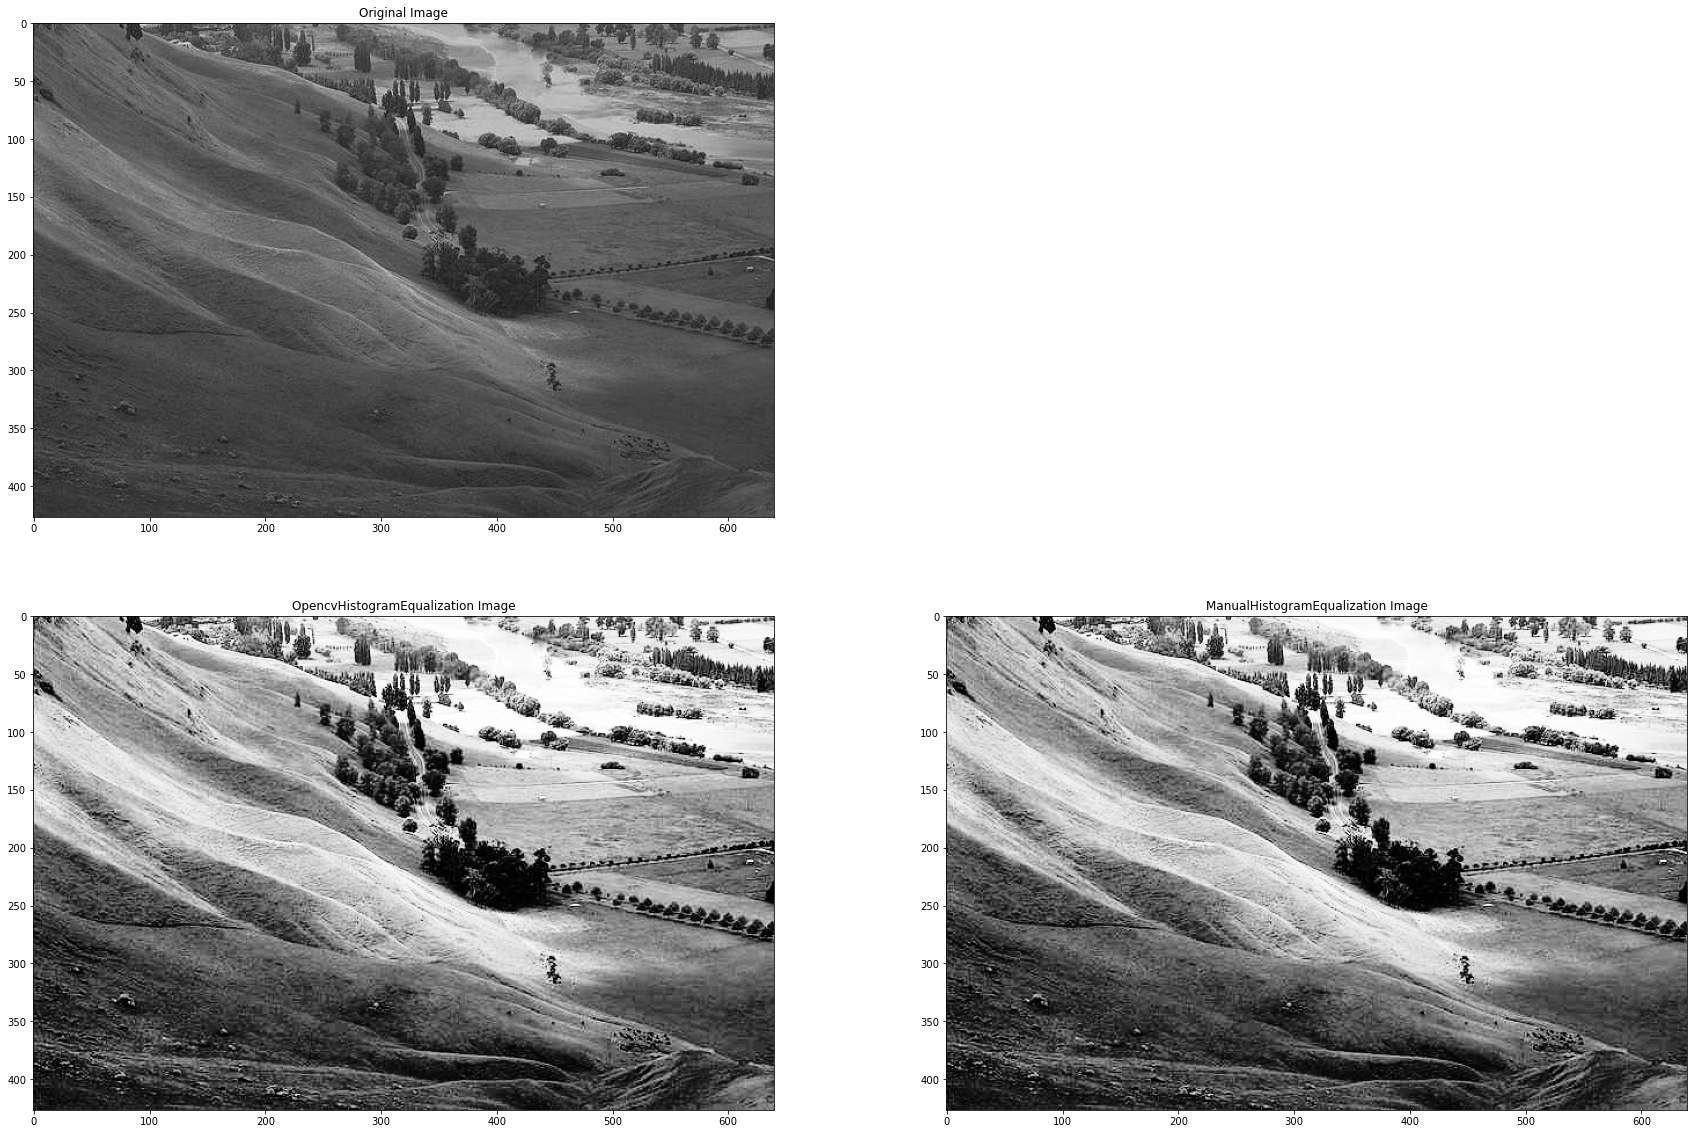

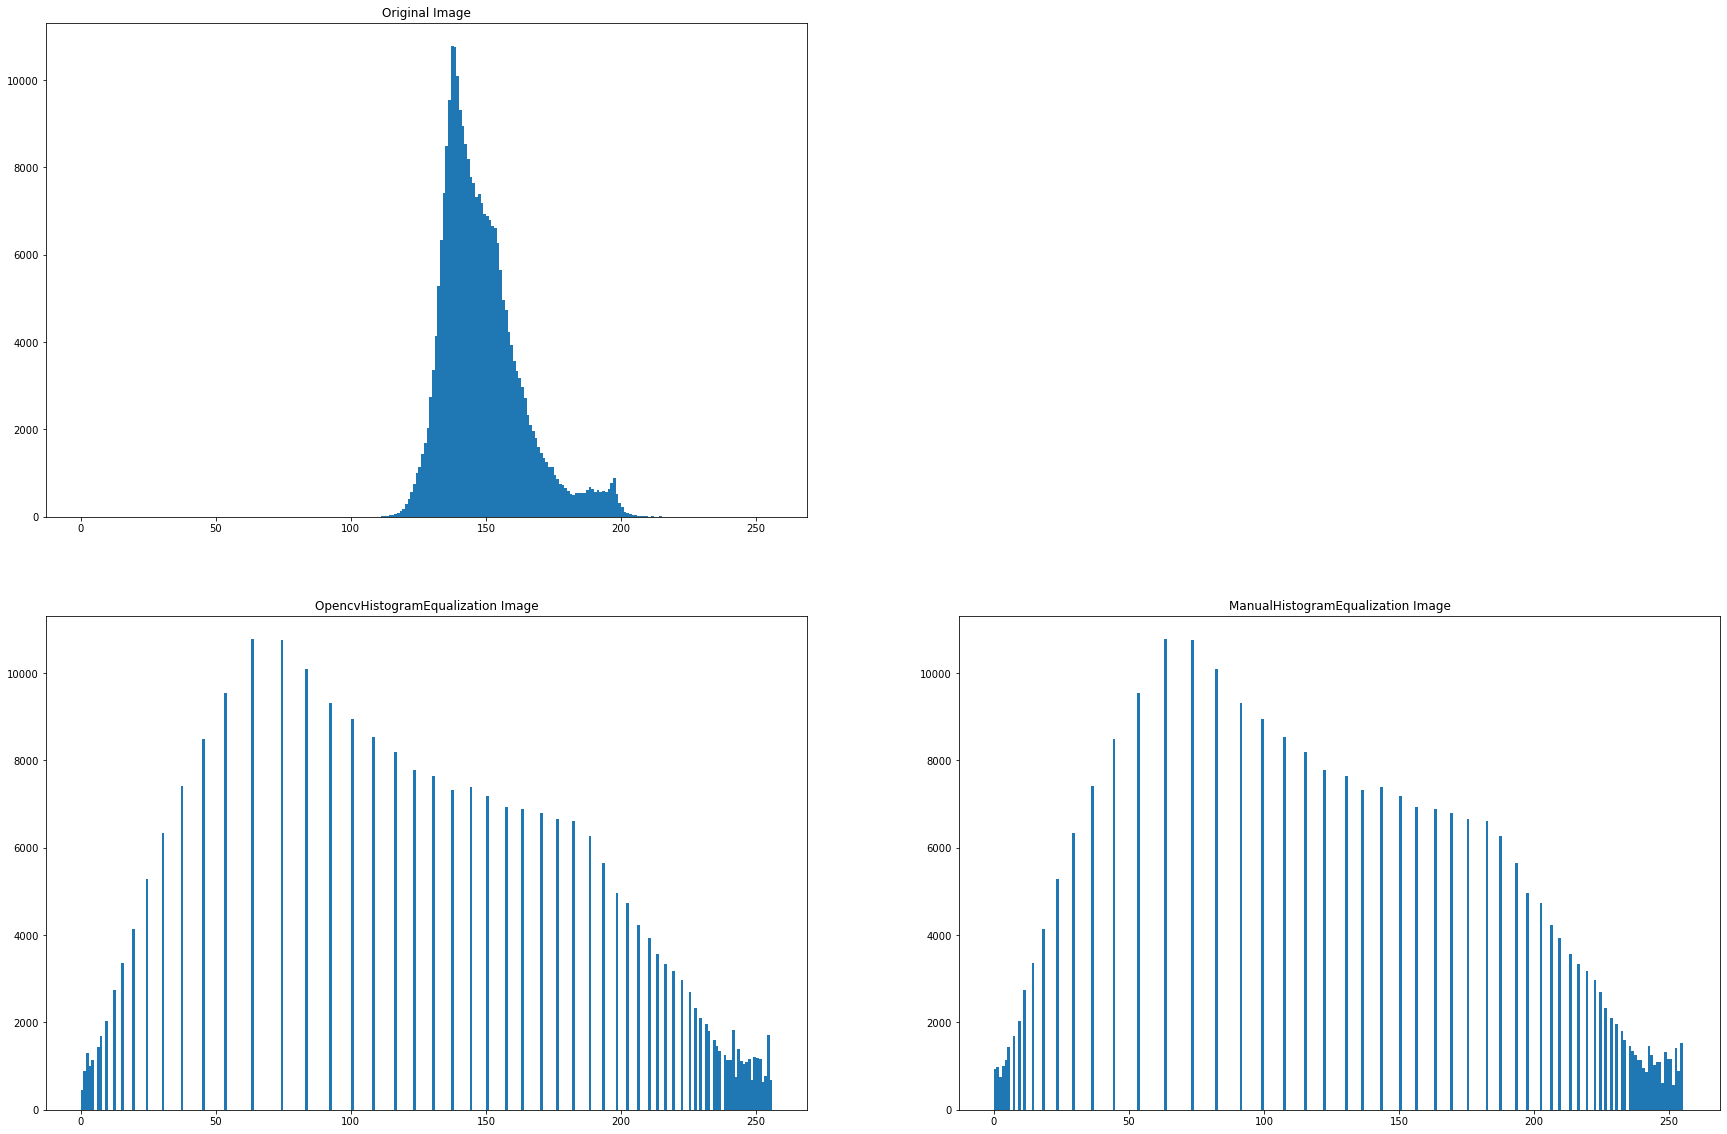

In [30]:
if __name__ == "__main__":
    gray = read_image()
    equ1 = OpencvHistogramEqualization(gray)
    
    gray = read_image()
    equ2 = ManualHistogramEqualization1(gray)
    
    img_show(gray,equ1,equ2)
    plot_show(gray,equ1,equ2)